**GRIP@The Spark Foundation- Data Science & Business Analytics Internship (Aug 2021)**

**Task 1: Prediction using Supervised ML**

**Aim: To predict the percentage of a student based on the no. of study hours.**

**Author - Megha Argade**

**Importing Libraries required for data analysis**

In [263]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use("ggplot")


 **Reading the data from Dataset**

In [264]:
dataset ="/content/Student Marks Prediction Dataset.csv"
student_data = pd.read_csv(dataset)
print("Data imported successfully")
student_data.head(10) #if no number is written then it will display first 5 headings


Data imported successfully


,study_hours,student_marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [265]:
student_data.tail(10)

,study_hours,student_marks
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [266]:
#To identify the number of rows and columns of the data
student_data.shape

(25, 2)

In [267]:
#Size of dataframe which is calculated by number of rows and columns
student_data.size

50

In [268]:
#Summary Of Statistics
student_data.describe()

,study_hours,student_marks
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [269]:
#to get the summary of dataframe
student_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    25 non-null     float64
 1   student_marks  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [270]:
student_data.dtypes

study_hours      float64
student_marks      int64
dtype: object

 **to find correlation**

In [271]:
student_data.corr()

,study_hours,student_marks
study_hours,1.000000,0.976191
student_marks,0.976191,1.000000


**Plotting the graph for distribution of scores**

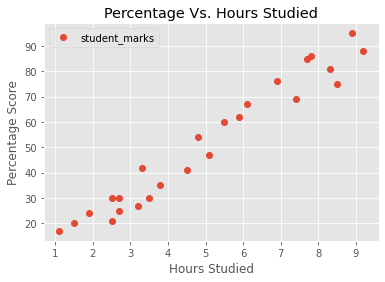

In [272]:
student_data.plot(x='study_hours', y='student_marks',style='o')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Percentage Vs. Hours Studied')  
plt.show()

In [273]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

In [274]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [275]:
print("The data has been trained")
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

The data has been trained


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 **Plotting for the test data**

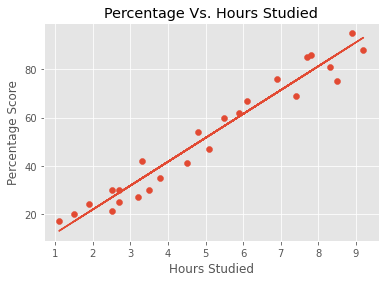

In [276]:
regression_line = regressor.coef_*X + regressor.intercept_
plt.scatter(X,y)
plt.plot(X, regression_line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Percentage Vs. Hours Studied') 
plt.show()

In [277]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual vs Predicted Score**

In [278]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predicted Score for a student who studies for 9.25 hrs/ day**

In [279]:
df = np.array(9.25)
df = df.reshape(-1, 1)
pred = regressor.predict(df)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))


If the student studies for 9.25 hours/day, the score is [93.69173249].


In [280]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002982
